<a href="https://colab.research.google.com/github/yumeniown/Software-Engineering-IT-Leaders-of-the-Future/blob/main/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F%2C_%D1%87_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лекция 2.4 Часть 2 Линейные модели машинного обучения

In [ ]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
%matplotlib inline
plt.style.use('seaborn-v0_8')

from google.colab import drive
drive.mount('/content/drive')
# cwd = os.getcwd()
# print(cwd)


KeyboardInterrupt: 

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_data = pd.read_csv('drive/MyDrive/housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Обучим с помощью градиентного спуска линейную регрессию на одном факторе — LSTAT (процент низкостатусного населения) —
#  и сравним результат с полученным ранее результатом МНК.

X = boston_data[['LSTAT']] #матрица наблюдений
y = boston_data['MEDV'] #вектор правильных ответов

Будем использовать реализацию стохастического градиентного спуска для линейной регрессии из библиотеки sklearn — SGDRegressor. Она находится в том же модуле linear_model.

У класса SGDRegressor есть множество параметров. Например, параметр random_state отвечает за число, на основе которого происходит генерация  случайных чисел. Напомним, в SGD случайность присутствует в инициализации параметров и выборе части из набора данных. Установив значение параметра random_state равным определённому числу, мы можем гарантировать одинаковые результаты работы метода при разных запусках. Пусть это будет число 42.

Для обучения используется метод fit(): он запускает работу градиентного спуска для поиска параметров, в него необходимо передать данные и правильные ответы.

In [ ]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_lstat = linear_model.SGDRegressor(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
sgd_lr_lstat.fit(X, y)

SGDRegressor(random_state=42)

In [ ]:
print('w0: {}'.format(sgd_lr_lstat.intercept_)) #свободный член w0
print('w1: {}'.format(sgd_lr_lstat.coef_)) #остальные параметры модели w1, w2, ..., wm

w0: [34.33010969]
w1: [-0.96193242]


Обратите внимание, что значения параметров немного отличаются от полученных ранее с помощью МНК значений. Для МНК коэффициенты были равны:

* w0: [34.55384087938311]
* w1: [-0.95004935]

В этом нет ничего удивительного, ведь МНК — это аналитический метод, он выдаёт точное решение, а SGD — численный, и вычисления останавливаются, когда достигается приемлемая точность.

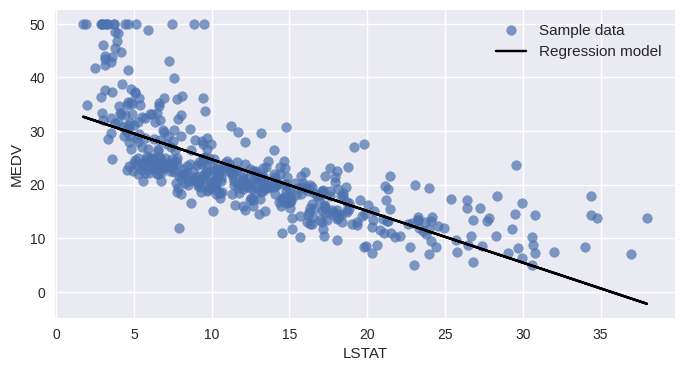

In [ ]:
#функция для визуализации регрессии
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(8, 4)) #фигура + координатная плоскость
    ax.scatter(X, y_true, alpha=0.7, label='Sample data') #диаграмма рассеяния
    ax.plot(X, y_predict, color='black', label='Regression model') #линейный график
    ax.set_xlabel(xlabel) #название оси абсцисс
    ax.set_ylabel(ylabel) #название оси ординат
    ax.legend(facecolor='white', fontsize=11) #легенда


#Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_lstat.predict(X)
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

In [ ]:
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: 0.542


Итоговый R^2 для линейной регрессии, обученной с помощью градиентного спуска, составил 0.542. Напомним, для той же модели, обученной с помощью МНК, метрика была равна 0.544. То есть доля информации, которую объяснила модель, обученная с помощью градиентного спуска, ниже примерно на 0.002. Очевидно, в реальных задачах такая разница не имеет значения.

Теперь попробуем обучить многомерную линейную регрессию с помощью SGD. Как и раньше составим полную матрицу наблюдений  из всех факторов, которые нам даны.

In [ ]:
#Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']

#Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
sgd_lr_full.fit(X, y)

#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})
#Составляем строчку таблицы со свободным членом
intercept_df = pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
coef_df

,Features,Coefficients
0,CRIM,-5.906323e+11
1,ZN,9.939534e+10
2,INDUS,-2.643548e+11
3,CHAS,-7.581326e+10
4,NOX,-6.056499e+09
5,RM,7.721585e+10
6,AGE,-1.566358e+11
7,DIS,2.345020e+11
8,RAD,-4.036876e+11
9,TAX,-2.362682e+11


Все коэффициенты имеют запредельные значения (9-11 степени числа 10). Это типичная картина расходящегося градиентного спуска: алгоритм не достиг точки минимума по каким-то причинам. Такие высокие значения коэффициентов означают, что модель является неустойчивой.

In [ ]:
# Давайте сделаем предсказание и выведем R^2 для обученной модели:

#Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_full.predict(X)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -51207467639430013245194240.000


In [ ]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


отрицательный R^2 говорит о том, что модель абсолютно не описывает зависимости в данных.

Почему SGD не справился с поиском 14 параметров (свободный член + 13 коэффициентов при факторах)?
 — отсутствие масштабирования, при использовании градиентного спуска и его модификаций очень важно масштабировать данные с помощью нормализации или стандартизации. Иначе алгоритм теряется в таком растянутом пространстве из-за неравномерных градиентов.

Давайте стандартизируем наши данные. Воспользуемся классом StandardScaler из модуля preprocessing библиотеки sklearn, который реализует стандартизацию.

In [ ]:
from sklearn import preprocessing

#Инициализируем стандартизатор StandardScaler
scaler = preprocessing.StandardScaler()
#Производим стандартизацию
X_scaled = scaler.fit_transform(X)
#Составляем DataFrame из результата
X_scaled = pd.DataFrame(X_scaled, columns=features)
X_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [ ]:
X_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02
mean,-1.123388e-16,7.898820e-17,2.106352e-16,-3.510587e-17,-1.965929e-16,-1.088282e-16,-1.474446e-16,-8.425408e-17,-1.123388e-16,0.000000,-4.212704e-16,-7.442444e-16,-3.089316e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-0.767576,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-0.464673,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194,1.638828e+00,4.410519e-01,3.548771e+00


In [ ]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_full.fit(X_scaled, y)

#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})
#Составляем строчку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
coef_df

,Features,Coefficients
0,CRIM,-0.870552
1,ZN,0.947112
2,INDUS,-0.116802
3,CHAS,0.730289
4,NOX,-1.894276
5,RM,2.757578
6,AGE,-0.027846
7,DIS,-3.049237
8,RAD,1.957066
9,TAX,-1.305271


In [ ]:
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_full.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: 0.740


Если вы обучили модель на стандартизованных данных, то и для предсказания необходимо передавать их в стандартизованном виде.

Например, если попытаться сделать предсказание с помощью построенной модели, передав в качестве матрицы наблюдений нестандартизованную таблицу, то ошибки мы не получим, однако значение метрики будет неадекватным:

In [ ]:
#Предсказываем медианную цену для всех участков из набора данных
#Передаём нестандартизованные данные
y_predict = sgd_lr_full.predict(X)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -1856.503


У класса SGDRegressor, помимо random_state, есть ещё множество различных внешних параметров, которые можно настраивать. Со всем списком вы можете ознакомиться в документации. Несколько самых важных:

* loss — функция потерь. По умолчанию используется squared_loss — уже привычная нам MSE. Но могут использоваться и несколько других. Например, значение "huber" определяет функцию потерь Хьюбера. Эта функция менее чувствительна к наличию выбросов, чем MSE.

* max_iter — максимальное количество итераций, выделенное на сходимость. Значение по умолчанию — 1000.

* learning_rate — режим управления темпом обучения. Значение по умолчанию — 'invscaling'. Этот режим уменьшает темп обучения. Если вы не хотите, чтобы темп обучения менялся на протяжении всего обучения, то можете выставить значение параметра на "constant".

* eta0 — начальное значение темпа обучения . Значение по умолчанию — 0.01.
Если параметр learning_rate="constant", то значение этого параметра будет темпом обучения на протяжении всех итераций.

* power_t — значение мощности уменьшения. То есть данный параметр отвечает за степень знаменателя (чем больше степень, тем быстрее уменьшается значение темпа обучения с каждой итерацией). Значение по умолчанию — 0.25.

In [ ]:
# Давайте посмотрим, что будет, если выставить константный режим управления темпом обучения и задать ему более высокое значение, например 0.1:

#Создаём объект класса линейной регрессии с SGD
sgd_lr_bad = linear_model.SGDRegressor(
    learning_rate='constant', #режим темпа обучения — константа
    eta0=0.1, #начальное и постоянное значение темпа обучения
    random_state=42
)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_bad.fit(X_scaled, y)
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_bad.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -335415038359.635


In [ ]:
# Вот ещё один плохой пример. Что будет, если поставить слишком маленькое значение параметра eta0? Например, 0.000001.

#Создаём объект класса линейной регрессии с SGD
sgd_lr_bad2 = linear_model.SGDRegressor(
    learning_rate='constant', #режим темпа обучения — константа
    eta0=1e-6, #начальное и постоянное значение темпа обучения
    random_state=42
    # ,max_iter = 1_000_000_000
)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_bad2.fit(X_scaled, y)
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_bad2.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -1.578


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


предупреждение (warning), говорит о том, что алгоритму не хватило количества итераций (max_iter), чтобы добраться до минимума. То есть SGD не дошёл до точки минимума из-за слишком низкого темпа обучения.

Так как модель линейной регрессии является довольно простой и исследованной, то значения параметров, которые обладают наибольшей эффективностью, уже установлены по умолчанию (аргументы по умолчанию), но бывают ситуации, когда поэкспериментировать с параметрами может быть полезно, чтобы попытаться повысить качество.

Метод решения и его сходимость к истинному минимуму:


*   LinearRegression - Аналитический — метод наименьших квадратов. Это главное преимущество метода: есть формула => подставили значения => совершили вычисления. Аналитический метод по определению является сходящимся, так как опирается на условие минимума функции.
*   SGDRegressor - Численный — метод стохастического градиентного спуска. Поиск минимума осуществляется итерациями. Сходимость зависит от множества факторов: темпа обучения, характера функции потерь, критерия остановки.


Функция потерь:


*   LinearRegression - Средний квадрат ошибки (MSE)
*   SGDRegressor - Любая гладкая функция, главное — чтобы она была дифференцируемой во всех точках. Функции потерь, доступные в sklearn, можно увидеть [здесь](https://scikit-learn.ru/1-5-stochastic-gradient-descent/#mathematical-formulation). Каждая функция потерь предназначена для конкретной задачи.


Сложность алгоритма и время обучения:

*   LinearRegression - Кубическая сложность из-за вычисления обратной матрицы.
Время обучения кубически возрастает, что критически сказывается на наборах данных с большим количеством признаков.
*   SGDRegressor - Линейная сложность, простые математические операции умножения и сложения.
Время обучения линейно возрастает с количеством признаков.

Возможность дообучения по новым данным:

*   LinearRegression - Отсутствует. Все данные должны быть поданы в модель заранее. Новый вызов fit() приведёт к новой настройке параметров.
*   SGDRegressor - Есть возможность дообучить модель на новых данных в режиме реального времени (инкрементальное обучение). Повторный вызов fit() уточняет уже существующие параметры модели.

Чувствительность к разному масштабу факторов:
*   LinearRegression - Низкая, стандартизация (нормализация) факторов желательна только на большом количестве признаков в данных.
*   SGDRegressor - Обязательная стандартизация (нормализация) факторов при наличии разных масштабов из-за особенностей сходимости.

Подбор внешних параметров:
*   LinearRegression - Внешних параметров нет.
*   SGDRegressor - Для поисков лучшего решения, возможно, придётся подбирать параметры: начальный темп обучения, режим обучения и т. д. Правильную реализацию подбора параметров мы обсудим в отдельном модуле.


**Вывод**:

* Если стоит задача одноразового обучения на всех данных, которые есть, и признаков немного (меньше 1 000), наш выбор — LinearRegression, так как МНК обеспечивает простое решение и гарантированную сходимость.
* Если стоит задача непрерывного обучения модели в процессе её эксплуатации или количество признаков очень велико, наш выбор — SGDRegressor с возможностью корректировки параметров на новых данных.

### СМЕЩЕНИЕ И РАЗБРОС

До этого момента мы обучали модели на всех имеющихся данных.
* С одной стороны, это имеет смысл, ведь мы хотим минимизировать ошибки модели, используя как можно больше данных для обучения.
* С другой стороны, из-за такого подхода становится труднее оценивать, насколько хорошо работает модель. Причина этого в том, что, если мы продолжим рассчитывать метрики, используя тренировочные данные, мы можем обнаружить, что при применении модели на незнакомых ей данных она работает довольно плохо.

→ Таким образом, модель может детально подстроиться под зависимость в обучающей выборке, но не уловить общей сути.

Такая проблема называется **переобучением** (overfitting). По сути, такая модель работает намного лучше с обучающими данными, чем с новыми. Она была чрезмерно натренирована на обнаружение уникальных характеристик обучающего набора данных, которые не являются общими закономерностями.

**Недообучение** (underfitting) — проблема, обратная переобучению. Модель из-за своей слабости не уловила никаких закономерностей в данных. В этом случае ошибка будет высокой как для тренировочных данных, так и для данных, не показанных во время обучения.

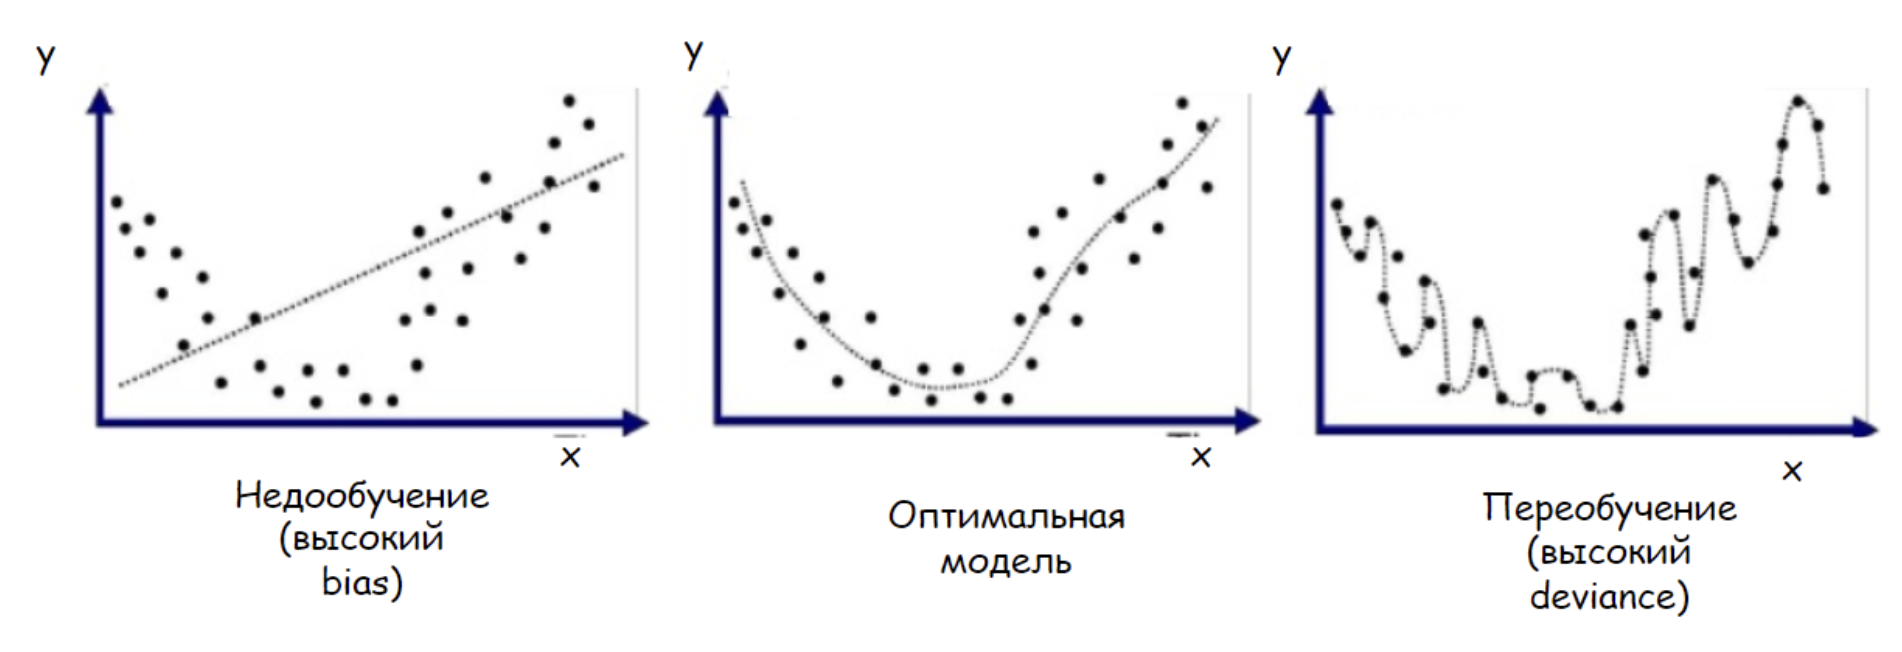

1. На первом рисунке изображена простая модель линейной регрессии, не способная уловить сложную зависимость в данных.
2. На втором рисунке изображена оптимальная модель, которая хорошо описывает зависимость и при этом не имеет переобучения (полином четвёртой степени).
3. На последнем рисунке изображен полином 27-й степени, который подстроился под каждую точку в тренировочном наборе, но не смог уловить общие закономерности.

С теоретической точки зрения недообучение и переобучение характеризуются понятиями смещения и разброса модели.

**Смещение** (bias) — это математическое ожидание разности между истинным ответом и ответом, выданным моделью. То есть это ожидаемая ошибка модели.

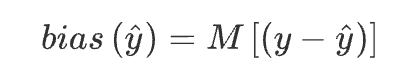

Чем больше смещение, тем слабее модель. Если модель слабая, она не в состоянии выучить закономерность. Таким образом, налицо недообучение модели.

**Разброс** (variance) — это вариативность ошибки, то, насколько ошибка будет отличаться, если обучать модель на разных наборах данных. Математически это дисперсия (разброс) ответов модели.

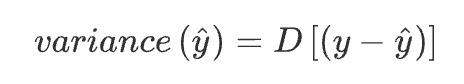

Чем больше разброс, тем больше ошибка будет колебаться на разных наборах данных. Наличие высокого разброса и есть свидетельство переобучения: модель подстроилась под конкретный набор данных и даёт высокий разброс ответов на разных данных.

Теоретически на составляющие смещения и разброса модели можно разложить любую функцию потерь. Например, разложение квадратичной ошибки (её математическое ожидание) будет выглядеть следующим образом:

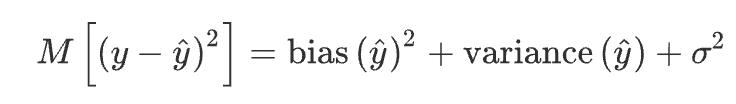

Ошибка модели складывается из смещения модели (в квадрате) и её разброса, а также случайной ошибки.

→ Если с последним слагаемым  мы ничего не сможем сделать, то вот на первые два (bias и variance) мы можем как-то повлиять. В идеале мы должны свести их к 0. Однако уменьшение одного слагаемого повлечёт увеличение другого. На практике часто приходится балансировать между смещёнными и нестабильными оценками.

Дилемма смещения-дисперсии является центральной проблемой в обучении с учителем. В идеале мы хотим построить модель, которая точно описывает зависимости в тренировочных данных и хорошо работает на неизвестных данных. К сожалению, обычно это невозможно сделать одновременно.

Усложняя модель, мы пытаемся уменьшить смещение (bias), однако появляется риск получить переобучение, то есть мы повышаем разброс (variance).

С другой стороны, снизить разброс (variance) позволяют более простые модели, не склонные к переобучению, но есть риск, что простая модель не уловит зависимостей и окажется недообученной, то есть мы повышаем смещение (bias).

По теореме Гаусса-Маркова, оценки линейной регрессии, полученные методом наименьших квадратов, обладают наименьшим разбросом. То есть если существует другая линейная модель, обученная способом, отличным от МНК (например, градиентным спуском), то теорема гарантирует, что эта модель будет обладать большим либо равным разбросом (variance), чем МНК-модель. То есть у линейной регрессии, обученной с помощью МНК, меньше всего риск переобучения.

Однако это не значит, что его не существует вовсе.

Теперь, когда мы знаем о теоретических основах проблемы переобучения и недообучения, что мы можем сделать, чтобы лучше судить о способности модели к обобщению на практике? Как диагностировать высокие bias и variance?

Типичным решением является разделение данных на две части: обучающий и тестовый наборы. На тренировочном наборе данных мы будем обучать модель, подбирая параметры. Тестовый набор данных, который модель не видела при обучении, мы будем использовать для оценки истинного качества моделирования.

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_data = pd.read_csv('drive/MyDrive/housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data.head()

#Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']

В sklearn для разделения выборки на тренировочную и тестовую есть функция train_test_split() из модуля model_selection. Данная функция принимает следующие аргументы:

* X и y — таблица с примерами и ответами к ним.
* random_state — число, на основе которого генерируются случайные числа. Тренировочная и тестовая выборка генерируются случайно. Чтобы эксперимент был воспроизводимым, необходимо установить этот параметр в конкретное значение.
* test_size — доля тестовой выборки. Параметр определяет, в каких пропорциях будет разделена выборка. Стандартные значения: 70/30, 80/20.


Функция возвращает четыре объекта в следующем порядке: тренировочные примеры, тестовые примеры, тренировочные ответы и тестовые ответы.

In [ ]:
from sklearn.model_selection import train_test_split
#Разделяем выборку на тренировочную и тестовую в соотношении 70/30
#Устанавливаем random_state для воспроизводимости результатов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
#Выводим результирующие размеры таблиц
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (354, 13) (354,)
Test: (152, 13) (152,)


In [ ]:
# Затем обучим линейную регрессию (с помощью МНК) на тренировочных данных и рассчитаем R^2 для тренировочных и тестовых данных:

#Создаём объект класса LinearRegression
lr_model = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model.fit(X_train, y_train)

#Делаем предсказание для тренировочной выборки
y_train_predict = lr_model.predict(X_train)
#Делаем предсказание для тестовой выборки
y_test_predict = lr_model.predict(X_test)

print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict)))

Train R^2: 0.743
Test R^2: 0.722


Показатели довольно близки друг к другу (низкий разброс ответов модели для разных выборок).

Это одно из свидетельств отсутствия переобучения. Это не удивительно, ведь линейная регрессия, построенная на 13 факторах, является довольно простой моделью: всего лишь 14 параметров, что очень мало по меркам машинного обучения. Риск переобучения возрастает с количеством факторов, которые участвуют в обучении модели.

Но что насчёт смещения? Самый простой способ оценить смещение и недообученность модели — посмотреть на значение метрики и интуитивно оценить её.

Может, наша модель слишком слабая? 0.722  — не слишком уж высокий показатель (напомним, максимум — 1). Возможно, стоит попробовать обучить более сложную модель. Например, можно построить модель полиномиальной регрессии.

##### У какой из моделей большое смещение (bias), а у какой — разброс (variance)?

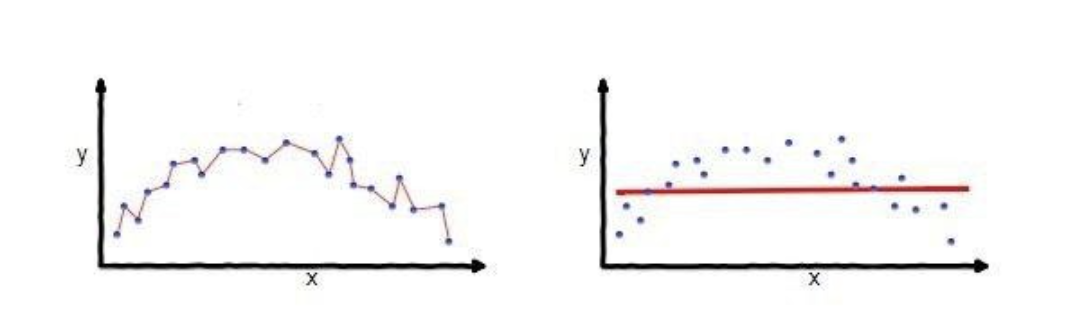

##### Ответ:

* У левой большой разброс (variance) - Большой разброс (variance) означает переобучение модели под тренировочный набор данных, то есть модель регрессии проходит через все точки тренировочного набора, образуя сложную кривую. На разных наборах данных будет велик разброс ошибок модели. Отсюда большой разброс (variance) наблюдается у левой модели.
*  У правой большое смещение (bias) - Большое смещение (bias) означает недообучение модели, то есть модель является слишком слабой и не способна описать зависимость в данных. Ожидаемое значение ошибки будет велико на любом наборе данных. Отсюда большое смещение у правой модели.

##### ПОЛИНОМИАЛЬНЫЕ ПРИЗНАКИ

**Полиномиальная регрессия** (Polynomial Regression) — это более сложная модель, чем линейная регрессия. Вместо уравнения прямой используется уравнение полинома (многочлена). Степень полинома может быть сколь угодно большой: чем больше степень, тем сложнее модель.

В простом двумерном случае, когда мы рассматриваем зависимость целевого признака от одного фактора, полиномом второй степени будет уравнение параболы.

Геометрически полином в двумерном пространстве — это некоторая кривая, которая пытается описать зависимость в данных. Выглядит это следующим образом:

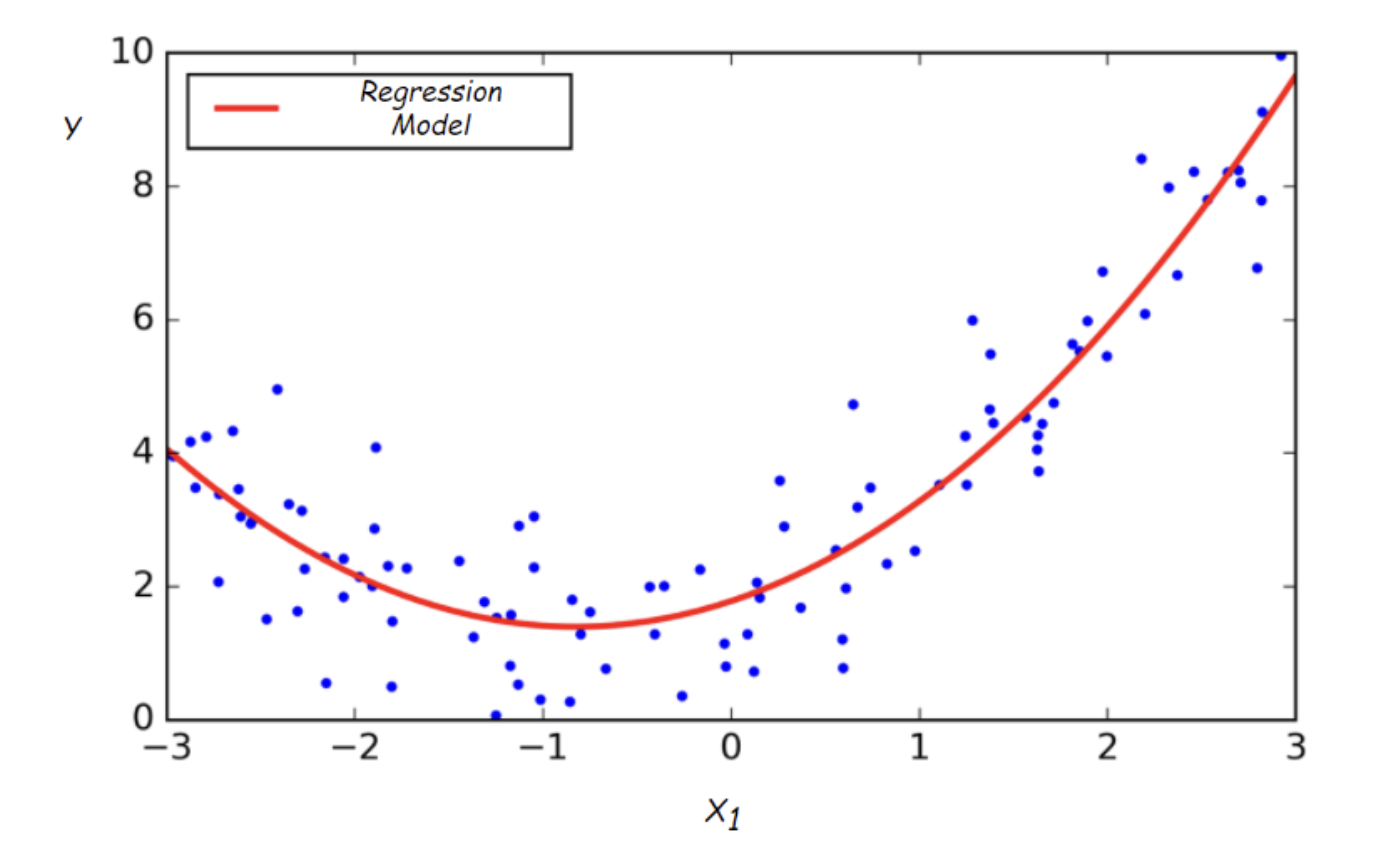

Когда факторов больше одного, например два, то, помимо возведения фактора в квадрат, появляются ещё и комбинации

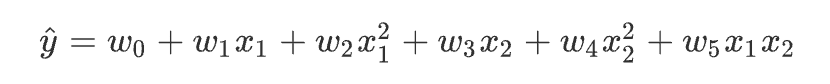

аметьте, как быстро растёт количество коэффициентов, а с ним и сложность модели. А ведь это только два фактора — x1 и x2. Мы не будем приводить уравнение для общего случая, как делали это с линейной регрессией, так как оно будет содержать слишком много слагаемых.

Например, рассматривая построенный ранее график зависимости медианной цены домов от процента низкостатусного населения, вы могли заметить, что между данными показателями существует не линейная, а скорее полиномиальная связь.

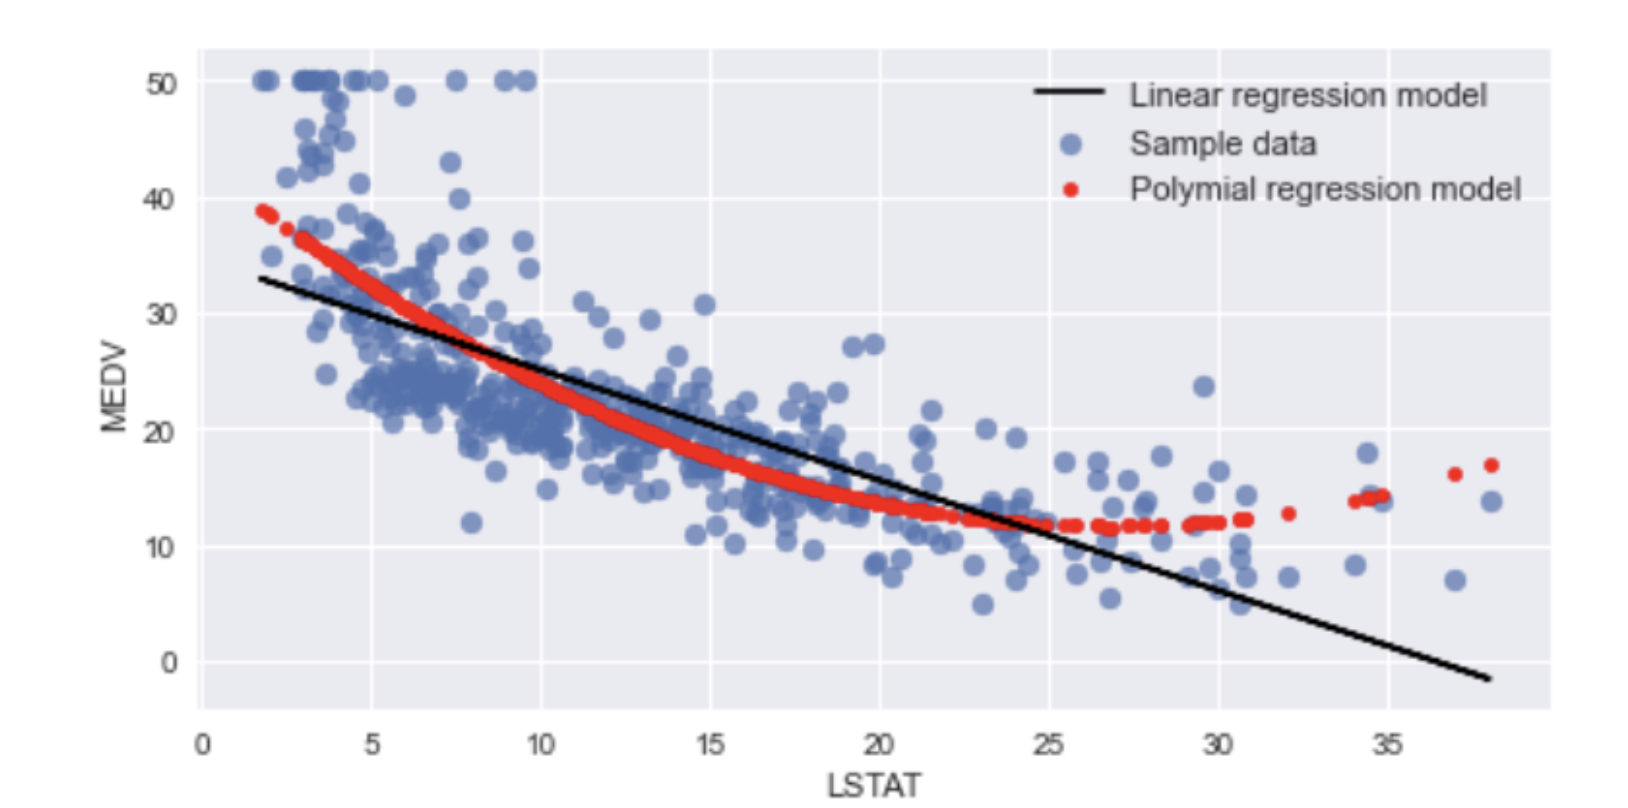

На рисунке изображены модели линейной и полиномиальной (вторая степень) регрессий.

Заметим, что степени x можно тоже считать своего рода искусственными признаками в данных. Они называются полиномиальными признаками.

Поэтому полиномиальная регрессия — это та же линейная регрессия, просто с новыми признаками. Полиномиальные признаки — один из самых распространённых методов FeatureEngineering.

 Благодаря степенным слагаемым модель становится сложнее и начинает улавливать более сложные зависимости и выдавать меньшее смещение. Но, как вы понимаете, резко повышается риск переобучения модели — увеличивается разброс предсказаний на разных данных из-за количества факторов.



Построить полиномиальную регрессию в sklearn очень просто. Для начала необходимо создать полиномиальные признаки с помощью объекта класса PolynomialFeatures из модуля preprocessing. Это преобразователь, который позволит сгенерировать полиномиальные признаки любой степени и добавить их в таблицу. У него есть два важных параметра:

* degree — степень полинома. По умолчанию используется степень 2.
* include_bias — включать ли в результирующую таблицу столбец из единиц (x в степени 0). По умолчанию стоит True, но лучше выставить его в значение False, так как столбец из единиц и так добавляется в методе наименьших квадратов.

Как правило, дата-сайентисты останавливаются на полиноме второй (максимум третьей) степени. Чем выше степень полинома, тем больше слагаемых, а значит, тем больше признаков и тем сложнее становится модель

Для того чтобы подогнать генератор и рассчитать количество комбинаций степеней, мы используем метод fit(), а чтобы сгенерировать новую таблицу признаков, в которую будут включены полиномиальные признаки, используется метод transform(), в который нужно передать выборки:

In [ ]:
from sklearn import preprocessing

#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_poly = poly.transform(X_test)
#Выводим результирующие размерности таблиц
print(X_train_poly.shape)
print(X_test_poly.shape)

(354, 104)
(152, 104)


Итак, мы сгенерировали новые тренировочные и тестовые наборы данных. В каждой таблице в дополнение к 13 изначальным признакам добавилась 91 полиномиальная комбинация степени 2.

В результате мы получили два numpy-массива:

In [ ]:
print(type(X_train_poly))
print(type(X_test_poly))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Теперь попробуем скормить наши данные модели линейной регрессии, чтобы найти коэффициенты полинома по МНК-алгоритму

#Создаём объект класса LinearRegression
lr_model_poly = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model_poly.fit(X_train_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lr_model_poly.predict(X_train_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lr_model_poly.predict(X_test_poly)

#Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.929
Test R^2: 0.268


На тренировочной выборке коэффициент детерминации 0.929, то есть наша модель описывает почти 93 % зависимости в данных.

Смотрим на показатели тестовой выборки 0.268 . Метрика значительно ниже, чем на тренировочном наборе. Это и есть переобучение модели. Из-за своей сложности (количества факторов) модель полностью адаптировалась под тренировочные данные, но взамен получила высокий разброс в показателях на данных, которые она не видела ранее.

* Модель линейной регрессии может быть неустойчивой, даже если показатели на тренировочной и тестовой выборках довольно близки, однако все коэффициенты уравнения имеют огромные значения.

Такая модель никому не нужна, так как она не отражает действительности.

Однако не стоит расстраиваться — есть один замечательный метод, который сможет спасти нашу модель от переобучения, и это **регуляризация**.



##### Вопросы
1. В чём заключается риск замены линейной регрессии на полиномиальную?
2. Какой метод PolynomialFeatures возвращает матрицу со сгенерированными полиномиальными признаками?

##### Ответы


1. Риск повышения разброса модели, а как следствие — переобучение
2. transform()

##### РЕГУЛЯРИЗАЦИЯ

**Регуляризация** — способ уменьшения переобучения моделей машинного обучения.

Идея регуляризации состоит в том, что мы намеренно пытаемся увеличить смещение модели, чтобы уменьшить разброс.  

Но как можно увеличить смещение модели? Мы можем «наказывать» модель за обучение сложным взаимосвязям.

Математически это будет очень простая операция — добавление к функции потерь некоторого штрафа.

**Штраф** — это дополнительное неотрицательное слагаемое в выражении для функции потерь, которое специально повышает ошибку.  За счёт этого слагаемого метод оптимизации (OLS или SGD) будет находить не истинный минимум функции потерь, а псевдоминимум.

Есть несколько способов добавления штрафа к функции потерь:

**L1-регуляризация (Lasso)** — добавление к функции потерь суммы модулей коэффициентов, умноженных на коэффициент регуляризации альфа:


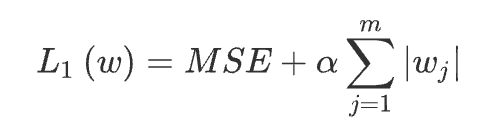

**L2-регуляризация** (Ridge), или регуляризация Тихонова — добавление к функции потерь суммы квадратов коэффициентов, умноженных на коэффициент регуляризации альфа:

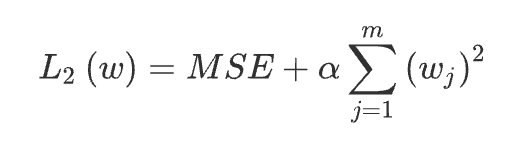

Коэффициенты альфа — это коэффициенты регуляризации. Они отвечают за то, насколько сильное смещение мы будем вносить в модель: чем оно больше , тем сильнее будет штраф за переобучение.

 В реализации sklearn для решения задачи оптимизации используется итеративный алгоритм координатного спуска (аналог градиентного спуска, но не использующий производную).

* Отличительной особенностью L1-регуляризации является то, что коэффициенты, которые соответствуют «ненужным», по мнению модели, факторам, обнуляются, то есть факторы просто не будут участвовать в предсказании. Это очень важно для сложных моделей, в обучении которых используются множество факторов (как в нашей модели выше — 91 фактор). Тем самым мы уменьшим сложность модели, сократим её разброс и, как следствие, уменьшим переобучение.

В заключение теоретической части хочется отметить, что на практике никогда не ясно, какой из методов регуляризации сработает лучше всего. Выход — пробовать оба метода и сравнивать результаты.



Практика показывает, что обучение линейной регрессии с большим количеством признаков рекомендуется производить на стандартизованных (нормализованных) данных.

**Часто возникает вопрос:** как правильно проводить стандартизацию/нормализацию при наличии тренировочной и тестовой выборки?

Вы обучаете (fit()) преобразование на тренировочной выборке и используете его с одними и теми же параметрами на тренировочной и тестовой выборке (transform()). Если производить подгонку на каждой из выборок в отдельности, вы внесёте смещение в модель.

Стандартизацию (нормализацию) полезнее проводить перед генерацией полиномиальных признаков, иначе можно потерять масштаб полиномов.

In [ ]:
# предобработаем наши данные:

#Инициализируем стандартизатор StandardScaler
scaler = preprocessing.StandardScaler()
#Подгоняем параметры стандартизатора (вычисляем среднее и СКО)
scaler.fit(X_train)
#Производим стандартизацию тренировочной выборки
X_train_scaled = scaler.transform(X_train)
#Производим стандартизацию тестовой выборки
X_test_scaled = scaler.transform(X_test)

#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_scaled_poly = poly.transform(X_train_scaled)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_scaled_poly = poly.transform(X_test_scaled)
#Выводим результирующие размерности таблиц

print(X_train_scaled_poly.shape)
print(X_test_scaled_poly.shape)

(354, 104)
(152, 104)


В sklearn методы регуляризации реализованы в классах Lasso (L1-регуляризация) и Ridge (L2-регуляризация). Оба метода осуществляют поиск параметров с добавлением регуляризации. Процесс обучения и предсказания не отличается от обычной линейной регрессии.

* Давайте построим модель линейной регрессии с L1-регуляризацией на сгенерированных нами ранее полиномиальных признаках.

Главный параметр инициализации Lasso — это alpha, коэффициент регуляризации. По умолчанию alpha=1. Практика показывает, что это довольно сильная регуляризация для L1-метода. Давайте установим значение этого параметра на 0.1.

In [ ]:
#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(alpha=0.1)
#Обучаем модель
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
#Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.879
Test R^2: 0.882


Обратите внимание на то, как изменились значения метрик. Да, на тренировочной выборке 0.879. Метрика упала (до стандартизации + регуляризации значение  было 0.929). Однако метрика ощутимо выросла на тестовой выборке:  0.882(ранее она была равна 0.268). Мы смогли преодолеть переобучение.

In [ ]:
# Давайте выведем значения коэффициентов модели, округлив их до третьего знака после запятой:

print(np.round(lasso_lr_poly.coef_, 3))

[-0.     0.    -0.038  0.    -0.523  2.766 -0.355 -0.605  0.    -0.595
 -0.763  0.    -3.259 -0.    -0.     0.     3.132 -0.141  0.     0.
  0.    -0.     0.     0.    -0.015 -0.     0.063 -0.    -0.     0.
  0.159 -0.    -0.    -0.     0.     0.07  -0.    -0.     0.017  0.
  0.    -0.     0.     0.     0.     0.    -0.    -0.     0.     0.46
 -0.808 -0.643  0.    -0.    -0.     0.    -0.     0.    -0.43  -0.348
 -0.511 -0.     0.    -0.14  -0.    -0.277  0.    -0.     0.223 -0.
 -0.    -0.836 -0.054 -0.421  0.019 -0.784  0.    -0.     0.706  0.
 -0.    -0.335 -0.198  0.    -0.     0.     0.205 -0.     0.531 -0.
  0.     0.048 -0.    -0.292  0.677  0.81  -0.    -1.151 -0.    -0.
 -0.    -0.288 -0.356  0.429]


большая часть коэффициентов обнулилась. Это значит, что признаки, которые соответствуют этим коэффициентам, не используются в прогнозе модели Lasso-регрессии.

In [ ]:
# Теперь давайте на тех же данных обучим модель линейной регрессии с L2-регуляризацией.
# Для L2-регуляризации параметр alpha по умолчанию равен 1. Давайте попробуем использовать значение параметра alpha=10:

#Создаём объект класса линейной регрессии с L2-регуляризацией
ridge_lr_poly = linear_model.Ridge(alpha=100)
#Обучаем модель
ridge_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = ridge_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = ridge_lr_poly.predict(X_test_scaled_poly)
#Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.861
Test R^2: 0.849


Значения метрики  на тестовой выборке для L1-регуляризации получились немного выше. В первую очередь мы всегда ориентируемся на тестовую выборку — это данные, которые модель ещё не видела.

In [ ]:
# Давайте выведем значения коэффициентов модели, округлив их до третьего знака после запятой:

print(np.round(ridge_lr_poly.coef_, 3))

[-0.111  0.147 -0.437  0.09  -0.476  2.232 -0.576 -0.347  0.141 -0.526
 -0.704  0.383 -1.892 -0.057 -0.013  0.173  0.726 -0.24   0.242  0.254
  0.086 -0.255  0.094  0.088 -0.097 -0.127  0.213 -0.026  0.139  0.12
  0.123 -0.191 -0.152 -0.033  0.111  0.161 -0.056  0.126  0.277  0.219
  0.121 -0.384  0.264  0.301  0.222  0.004  0.063  0.005 -0.181  0.319
 -0.675 -0.427  0.207 -0.177  0.194  0.382  0.076 -0.07  -0.503 -0.243
 -0.489 -0.036  0.374 -0.291 -0.067 -0.123 -0.005  0.023  0.315 -0.076
 -0.097 -0.465 -0.362 -0.602  0.166 -0.537  0.114 -0.047  0.385  0.197
 -0.027 -0.328 -0.485  0.135  0.042  0.242  0.147 -0.162  0.571 -0.117
  0.324  0.427 -0.059 -0.358  0.207  0.432 -0.092 -0.558 -0.01   0.04
 -0.112 -0.311 -0.47   0.155]


Видно, что L2-регуляризация не обнуляет коэффициенты — она использует для предсказания все признаки.

Параметр alpha имеет очень важное значение: от его выбора зависит, как сильно мы будем штрафовать модель за переобучение. Важно найти значение, которое приносит наилучший эффект.

Попробуйте вручную изменять параметр alpha для построенных ранее моделей. Согласитесь, это не очень удобно.

Организуем процесс перебора параметров модели: создадим цикл, в котором будем перебирать 20 различных значений alpha в диапазоне от 0.001 до 1. Такой список проще всего создать с помощью функции linspace() из библиотеки numpy.

В цикле будем обучать модель линейной регрессии и L1-регуляризацией (Lasso), вычислять значения метрики  на тренировочной и тестовой выборках и заносить результаты в списки train_scores и test_scores:

In [ ]:
#Создаём список из 20 возможных значений от 0.001 до 1
alpha_list = np.linspace(0.001, 1, 20)
#Создаём пустые списки, в которые будем добавлять результаты
train_scores = []
test_scores = []
for alpha in alpha_list:
    #Создаём объект класса линейной регрессии с L1-регуляризацией
    lasso_lr_poly = linear_model.Lasso(alpha=alpha, max_iter=10000)
    #Обучаем модель
    lasso_lr_poly.fit(X_train_scaled_poly, y_train)
    #Делаем предсказание для тренировочной выборки
    y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
    #Делаем предсказание для тестовой выборки
    y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
    #Рассчитываем коэффициенты детерминации для двух выборок и добавляем их в списки
    train_scores.append(metrics.r2_score(y_train, y_train_predict_poly))
    test_scores.append(metrics.r2_score(y_test, y_test_predict_poly))

In [ ]:
test_scores

[0.34338700777638054,
 0.8902273786511842,
 0.8818962656038821,
 0.8751104428710879,
 0.8602867349310188,
 0.8429171594149378,
 0.8256200647312932,
 0.815018409381632,
 0.8095636408928033,
 0.8055534044349667,
 0.8045527303548756,
 0.803097334498576,
 0.801188900399234,
 0.7991487664772452,
 0.7971019039731968,
 0.7953692490626056,
 0.793526961642926,
 0.7924243435178618,
 0.7911854300714243,
 0.7897125841661015]

В результате выполнения данного кода в списках train_scores и test_scores появятся 20 различных значений  на тренировочной и тестовой выборках.

Давайте построим линейные графики, которые покажут, как меняется метрика R^2 на тренировочной и тестовой выборках в зависимости от alpha:

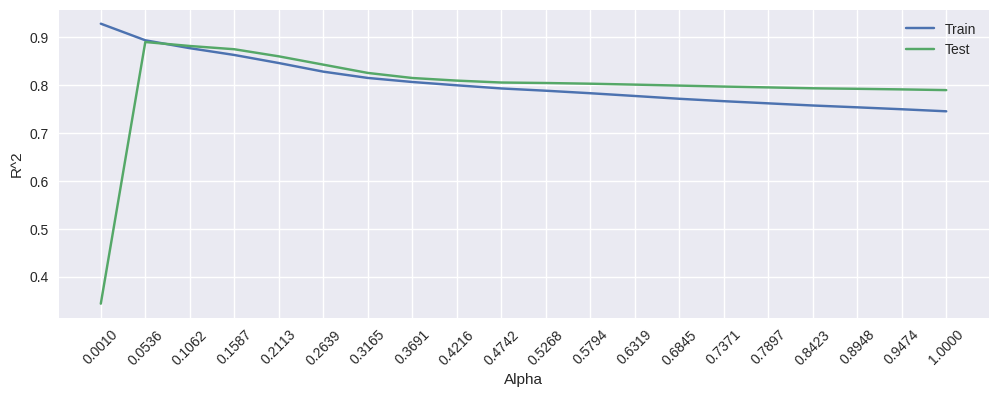

In [ ]:
#Визуализируем изменение R^2 в зависимости от alpha
fig, ax = plt.subplots(figsize=(12, 4)) #фигура + координатная плоскость
ax.plot(alpha_list, train_scores, label='Train') #линейный график для тренировочной выборки
ax.plot(alpha_list, test_scores, label='Test') #линейный график для тестовой выборки
ax.set_xlabel('Alpha') #название оси абсцисс
ax.set_ylabel('R^2') #название оси ординат
ax.set_xticks(alpha_list) #метки по оси абсцисс
ax.xaxis.set_tick_params(rotation=45) #поворот меток на оси абсцисс
ax.legend(); #отображение легенды

С помощью графика мы можем подобрать оптимальное значение параметра alpha. Нам нужна такая точка на оси абсцисс, при которой на тестовой выборке наблюдается максимальная метрика и при этом разница между метриками на тренировочной и тестовой выборках минимальна.

Видно, что  на тестовой выборке достигает наибольшего значения в точке 0.0536. Причём в этой точке наблюдается примерное равенство метрик на каждом наборе данных. Далее метрика на тестовой выборке начинает падать.

Обратите внимание, что на тренировочной выборке R^2 непрерывно падает с ростом alpha. Оно и понятно, ведь чем больше alpha, тем сильнее регуляризация и тем меньше модель подстраивается под обучающую выборку.

Давайте подставим значение alpha=0.0536 в модель Lasso и получим результат:

In [ ]:
#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(alpha=0.0536)
#Обучаем модель
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
#Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.894
Test R^2: 0.890


Итак, метрика выросла благодаря тому, что мы смогли подобрать оптимальное значение параметра alpha - **УРА**

Помимо основных методов регуляризации L1 и L2, существует комплексный метод.

**Эластичная сетка** (Elastic Net) — это комбинация из двух методов регуляризации.

В sklearn реализация эластичной сетки находится в объекте класса ElasticNet.

Параметры  и  позволяют регулировать вклад L1- и L2-регуляризации. На практике данный метод используется гораздо реже, так как нужно подбирать оптимальную комбинацию из двух параметров.

##### ПРАКТИКА

В этот раз мы коснёмся мира медицинского страхования. Нашей целью будет предсказать индивидуальные медицинские расходы граждан США, оплачиваемые медицинской страховкой. - https://www.kaggle.com/datasets/mirichoi0218/insurance

In [ ]:
data = pd.read_csv('drive/MyDrive/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Итак, набор данных содержит следующие столбцы:

* age — возраст страхователя;
* sex — пол;
* bmi — индекс массы тела , в идеале — от 18.5 до 24.9;
* children — количество детей, охваченных медицинской страховкой;
* smoker — является ли человек курящим;
* region — район проживания в США (северо-восток, юго-восток, северо-запад, юго-запад);
* charges (целевой признак) — индивидуальные медицинские расходы, оплачиваемые медицинской страховкой.

In [ ]:
print(data.shape)

(1338, 7)


In [ ]:
# Выведем информацию о пропусках, так как наличие пропусков не позволит нам построить модель линейной регрессии:

data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
# Посмотрим на типы данных:

data.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


Наши данные содержат несколько типов признаков:

* age, bmi, children — числовые признаки;
* sex, smoker — бинарные категориальные переменные (две категории);
* region — множественные категориальные переменные (несколько категорий);
* charges — числовой целевой признак.

Прежде чем приступать к этапу подготовки данных для модели, вы можете произвести небольшое исследование зависимостей в данных, например построить следующие графики и диаграммы:

* гистограммы/коробчатые диаграммы числовых признаков;
* столбчатые диаграммы медианных медицинских расходов в зависимости от категориальных признаков;
* диаграммы рассеяния зависимости целевого признака от других числовых в разрезе категориальных (обратите особенное внимание на зависимость медицинских расходов от признака курения).

Мы знаем, что модель линейной регрессии не умеет работать с категориальными признаками, поэтому категории необходимо перекодировать.

Кодировку будем совершать по следующему принципу:

* smoker — переведём в бинарные значения (0 — некурящий, 1 — курящий);
* sex — аналогично (0 — female, 1 — male);
* region — используем OneHot-кодирование (воспользуемся функцией get_dummies).

In [ ]:
#кодируем бинарные категориальные признаки
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)
#оставшиеся категориальные признаки кодируем с помощью OneHot
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [ ]:
# Прежде чем переходить к этапу моделирования, нам необходимо позаботиться о создании выборки для тестирования модели.

features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print('Train:', X_train.shape)
print('Test:', X_test.shape)

Train: (1070, 9)
Test: (268, 9)


In [ ]:
# Обучим модель линейной регрессии аналитическим методом (LinearRegression) на тренировочном наборе данных.
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Сделаем предсказание и рассчитаем метрики

def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Test MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))


y_train_predict = lr_model.predict(X_train)
y_test_predict = lr_model.predict(X_test)

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.742
Train MAE: 4208
Train MAPE: 42


Test R^2: 0.784
Test MAE: 4181
Test MAPE: 47


Построим диаграмму boxplot для визуализации ошибок модели линейной регрессии на тренировочной и тестовой выборках. В качестве ошибки возьмем разницу между истинным ответом и предсказанием

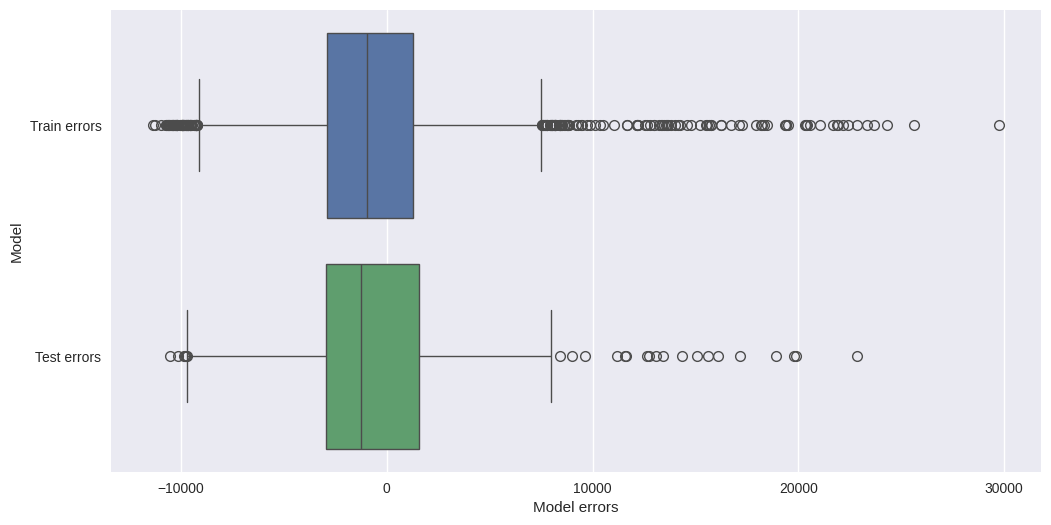

In [ ]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура + координатная плоскость
#Ошибки модели на тренировочной выборке
y_train_errors = y_train - lr_model.predict(X_train)
#Ошибки модели на тестовой выборке
y_test_errors = y_test - lr_model.predict(X_test)
#Для удобства визуализации составим DataFrame из ошибок
predict_df = pd.DataFrame(
    {'Train errors': y_train_errors,
     'Test errors': y_test_errors
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=predict_df, orient='h', ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

* Разброс ошибок на тренировочной выборке больше, чем на тестовой.
* Медианная ошибка на тренировочной и тестовой выборках отрицательная (меньше 0).

Нормализуем тренировочную и тестовую выборки с помощью min-max-нормализации (MinMaxScaler).

* Min-max-нормализация не искажает изначальный вид бинарных категориальных признаков, в отличие от стандартизации.

На нормализованных данных сгенерируем полиномиальные признаки степени 2. Воспользуемся классом PolynomialFeatures из библиотеки sklearn.

In [ ]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)
print(X_train_scaled_poly.shape)

(1070, 54)


## ДЗ


1.   Обучите модель линейной регрессии на полиномиальных признаках. Чему равно значение метрик?
2.   Выведите значения коэффициентов полученной модели. Посмотрите на степени коэффициентов.
3. Постройте линейную регрессию с L1-регуляризацией (Lasso) на полиномиальных признаках. В качестве параметра alpha используйте значение по умолчанию, параметр max_iter установите в значение 2000. Чему равно значение метрик?
4. Постройте линейную регрессию с L2-регуляризацией на полиномиальных признаках. В качестве параметра alpha используйте значение по умолчанию. Чему равно значение метрик?
5. По желанию: подобрать лучшее значение alpha(если оно есть).



